### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time is appropriate!

This will help you, especially in the equilibration phases of your simulations.

Il programma scritto permette proseguire la simulazione ricominciando dalla configurazione finale. Il comando di *restart* viene passato al programma o attraverso la **riga di comando**: <center>*./MolDyn_NVE.x (0 o 1) * </center> dove 0 inizia una nuova simulazione 1 riparte dalla configurazione *config.old*. Se non viene specificato il valore di *restart* da riga di comando il programma stampa un messaggio in cui chiede quale valore assegnare alla variabile prima di cominicare la simulazione.

Ogni volta che la simulazione viene lanciata nella modalità *restart* il programma misura la temperatura della configurazione caricata *config.final* e se diversa da quella caricata dal file *input.dat* corregge le velocità iniziali delle pearticelle. Lo script di python qui sotto inizia una nuova simulazione (500 step) e la fa ripartire dalla *config.final* fino a quando la temperatura media della singola simulazione non coincide con quella letta nel file *input.dat* con uno scarto di $0.05$. Il secondo script mostra i valori istantanei di alcune osservabili (pressione, temperatura, energia totale, energia cineatica, energia potenziale) durante tutte le simulazioni svolte. Si notano i salti di discontinuità tra una simulazione e l'altra soprattutto all'inizio quando le correzioni sono grandi.

In [8]:
import numpy as np
import os

desire_temp=float(open('input.dat', 'r').readline())
print("disidered temperature = ",desire_temp)
j=0
final_temp=0

os.system("make clean")
os.system("make")
os.system("./MolDyn_NVE.x 0")

while(final_temp<desire_temp-0.05 or final_temp>desire_temp+0.05):
    j += 1
    os.system("./MolDyn_NVE.x 1")
    with open("./risultati/ave_temp.dat", "r") as file:
        lines = file.read().splitlines()
    i,final_temp,error=map(float, lines[-1].split(' '))
    print("Final temperature of the ",j,"-th tries = ",final_temp)

disidered temperature =  1.1
Final temperature of the  1 -th tries =  0.876725
Final temperature of the  2 -th tries =  1.02689
Final temperature of the  3 -th tries =  1.04762
Final temperature of the  4 -th tries =  1.10424


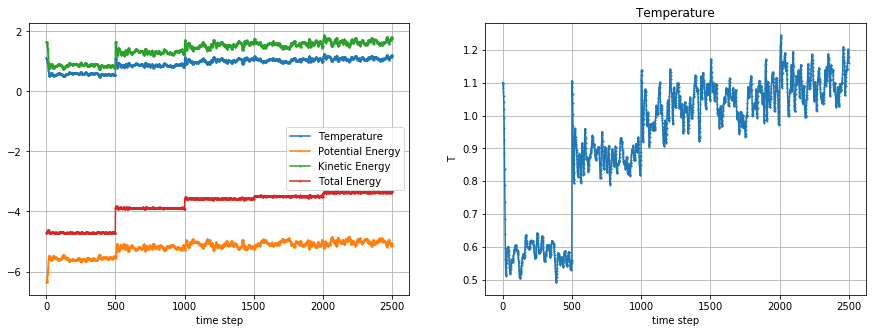

In [9]:
import matplotlib
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
Etot = np.loadtxt("./risultati/output_etot.dat")
Epot = np.loadtxt("./risultati/output_epot.dat")
Ekin = np.loadtxt("./risultati/output_ekin.dat")
Temp = np.loadtxt("./risultati/output_temp.dat")

plt.plot(Temp, '.-', markersize=2, label="Temperature" )
plt.plot(Epot, '.-', markersize=2, label="Potential Energy" )
plt.plot(Ekin, '.-', markersize=2, label="Kinetic Energy")
plt.plot(Etot, '.-', markersize=2, label="Total Energy" )
plt.legend()
plt.xlabel("time step")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Temp, '.-', markersize=2, label="Temperature" )
plt.xlabel("time step")
plt.ylabel("T")
plt.title("Temperature")
plt.grid(True)

plt.show()